In [34]:
from loader import load_pop_metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['font.size'] = 12

import sys
sys.path.append("/auto/users/hellerc/code/projects/nat_pupil_ms/")
from global_settings import CPN_SITES, HIGHR_SITES

In [35]:
modelname = "factor_analysis"

In [59]:
sites = CPN_SITES + HIGHR_SITES
batches = [331]*len(CPN_SITES) + [322 if s.startswith("BOL")==False else 294 for s in HIGHR_SITES]
columns = ["bp_sv", "sp_sv", "bp_dim", "sp_dim", "bp_dim_sem", "sp_dim_sem", "bp_ls", "sp_ls", "site", "batch"]
metrics = pd.DataFrame(columns=columns, index=range(len(sites)))
metrics_all = pd.DataFrame(columns=columns, index=range(len(sites)))
for i, (s, b) in enumerate(zip(sites, batches)):
    r = load_pop_metrics(site=s, batch=b, modelname=modelname)
    metrics.iloc[i] = [r["bp_sv"], r["sp_sv"], r["bp_dim95"], r["sp_dim95"], r["bp_dim_sem"], r["sp_dim_sem"], r["bp_loading_sim"], r["sp_loading_sim"], s, b]
    metrics_all.iloc[i] = [r["final_fit"]["bp_sv_all"], r["final_fit"]["sp_sv_all"], r["final_fit"]["bp_dim95_all"], r["final_fit"]["sp_dim95_all"], r["bp_dim_sem"], r["sp_dim_sem"], r["final_fit"]["bp_ls_all"], r["final_fit"]["sp_ls_all"], s, b]

In [71]:
#metrics = metrics_all
metrics[metrics.site=="TNC013a"]

,bp_sv,sp_sv,bp_dim,sp_dim,bp_dim_sem,sp_dim_sem,bp_ls,sp_ls,site,batch
7,0.38097,0.372642,8,5.06667,0.565194,0.338898,0.0469487,0.226656,TNC013a,331
30,0.480386,0.168789,5.03333,2,0.214636,0.239573,0.161991,0.154864,TNC013a,322


Text(0.5, 1.0, 'nDim')

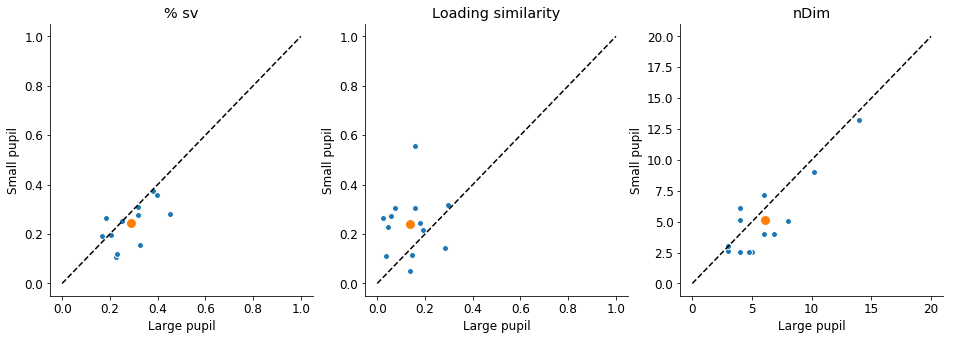

In [72]:
mask = metrics.batch==331 # [True]*len(metrics) #
f, ax = plt.subplots(1, 3, figsize=(16, 5))

ax[0].scatter(metrics[mask]["bp_sv"], metrics[mask]["sp_sv"], edgecolor="white")
ax[0].scatter(metrics[mask]["bp_sv"].mean(), metrics[mask]["sp_sv"].mean(), s=100, edgecolor="white")
ax[0].plot([0, 1], [0, 1], "k--")
ax[0].set_xlabel("Large pupil")
ax[0].set_ylabel("Small pupil")
ax[0].set_title("% sv")

ax[1].scatter(metrics[mask]["bp_ls"], metrics[mask]["sp_ls"], edgecolor="white")
ax[1].scatter(metrics[mask]["bp_ls"].mean(), metrics[mask]["sp_ls"].mean(), s=100, edgecolor="white")
ax[1].plot([0, 1], [0, 1], "k--")
ax[1].set_xlabel("Large pupil")
ax[1].set_ylabel("Small pupil")
ax[1].set_title("Loading similarity")

ax[2].scatter(metrics[mask]["bp_dim"], metrics[mask]["sp_dim"], edgecolor="white")
ax[2].scatter(metrics[mask]["bp_dim"].mean(), metrics[mask]["sp_dim"].mean(), s=100, edgecolor="white")
ax[2].plot([0, 20], [0, 20], "k--")
ax[2].set_xlabel("Large pupil")
ax[2].set_ylabel("Small pupil")
ax[2].set_title("nDim")

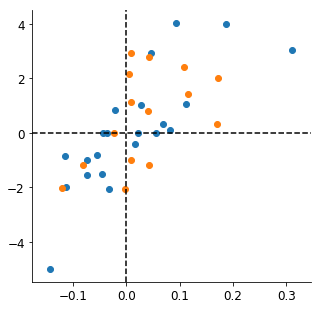

In [64]:
mask = metrics.batch==322 #abs(metrics["bp_dim"]-metrics["sp_dim"]) > (metrics["bp_dim_sem"]+metrics["sp_dim_sem"])
f, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(metrics[mask]["bp_sv"]-metrics[mask]["sp_sv"], metrics[mask]["bp_dim"]-metrics[mask]["sp_dim"])
ax.scatter(metrics[~mask]["bp_sv"]-metrics[~mask]["sp_sv"], metrics[~mask]["bp_dim"]-metrics[~mask]["sp_dim"])
ax.axvline(0, linestyle="--", color="k")
ax.axhline(0, linestyle="--", color="k")